# Section 4: Charts and APIs

Your team decided to design a dashboard to display the statistic of COVID19 
cases. You are tasked to display one of the components of the dashboard which 
is to display a visualisation representation of number of COVID19 cases in 
Singapore over time. 

Your team decided to use the public data from https://documenter.getpostman.com/view/10808728/SzS8rjbc#b07f97ba-24f4-4ebe-ad71-97fa35f3b683.

Display a graph to show the number cases in Singapore over time using the APIs 
from https://covid19api.com/.

*Note: please submit screenshots of the dashboard and also export your notebook 
as pdf (if you are using python).*

## Comments

There is some weird change in recovered and active cases in the API data. This
happens between 2 data points between 6th and 7th Aug 2021. The specific JSON
data is shown below:

{"ID":"ed39e630-62df-442c-a1f6-7960d10715cb","Country":"Singapore","CountryCode":"SG","Province":"","City":"","CityCode":"","Lat":"1.35","Lon":"103.82","Confirmed":65508,"Deaths":40,"Recovered":63457,"Active":2011,"Date":"2021-08-06T00:00:00Z"}

{"ID":"a0b24a1d-daf9-42be-a478-a19a1c075159","Country":"Singapore","CountryCode":"SG","Province":"","City":"","CityCode":"","Lat":"1.35","Lon":"103.82","Confirmed":65605,"Deaths":41,"Recovered":0,"Active":65564,"Date":"2021-08-07T00:00:00Z"}


In [1]:
import requests
import matplotlib.pyplot as plt
from dateutil import parser


In [2]:
# get the json data from the API
api_request_str = 'https://api.covid19api.com/live/country/singapore'
res = requests.get(api_request_str)


In [3]:
# parse the data, getting the case count and timestamp separately

confirmed_cases = []
death_cases = []
recovered_cases = []
active_cases = []
dates = []

for json_dict in res.json():
  confirmed_cases.append(json_dict['Confirmed'])
  death_cases.append(json_dict['Deaths'])
  recovered_cases.append(json_dict['Recovered'])
  active_cases.append(json_dict['Active'])
  dates.append(parser.parse(json_dict['Date']))

# NOTE: additional data - increase in cases per interval / day
increase_in_cases = [0]
for i in range(len(dates) - 1):
  increase_in_cases.append(confirmed_cases[i + 1] - confirmed_cases[i])


# Visualization

This section will provide the plots to visualize the cases over time.

Since there are many different types of cases, ideally we should be able to
change what we want to see.

In a website, perhaps some buttons or filters can be used to do this easily.

Because there is a large value in confirmed cases, it will change the scale of
the plot, which in turn affects the other types of data that we can plot.

I will plot 2 sets of graphs. The first set is the individual case counts, while
the other set is a combination of some of them.

If we are to design a dashboard component, then we'd want to be able to 
accomodate various graphs easily. In the context of this, it would mean to be
able to display different types of case counts (active, recovered, ...).

# Comments

We can see the increase in cases due to the omnicron variant recently.

The confirmed cases and increase in cases per day, shows this behavior. We can
see that there should be a peak in case increase, before it drops back down.
Currently we're probably not out of the peak for the omnicron variant.

There is also some weird behavior coming out from the recovered and active cases
from the API. This can be seen when the recovered count suddenly drops to 0, 
and stays there after 7th Aug 2021. This opposite behavior is seen with active
cases at the same day.



In [4]:
def visualize_cases(inputs: list, dates: list, labels: list):
  """Visualizes the different input cases over a period of time specified by 
  dates.

  Args:
    inputs (list): The List of Lists containing the individual data points.
    dates (list): The List of dates.
    labels (list): The List of strings containing the labels for each input list
    .
  """
  plt.figure(figsize=(20, 4.8))
  title_str = ''

  for i in range(len(inputs)):
    title_str += labels[i] + ', '
    plt.plot(dates, inputs[i], label=labels[i])

  plt.title(title_str[:len(title_str) - 2] + ' over time')
  plt.legend()
  plt.show()


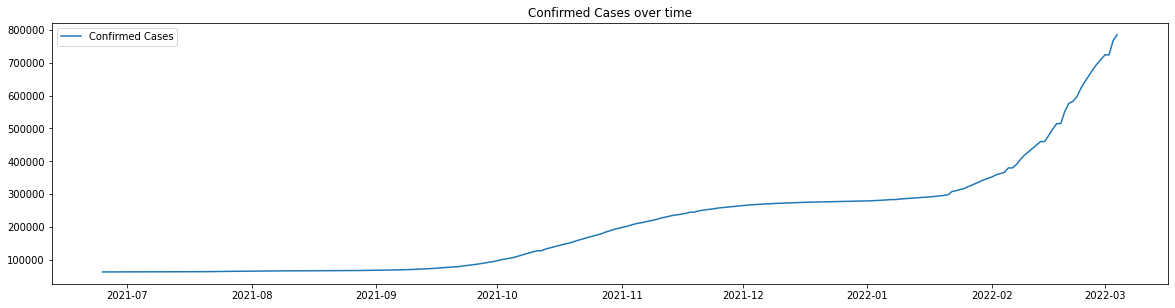

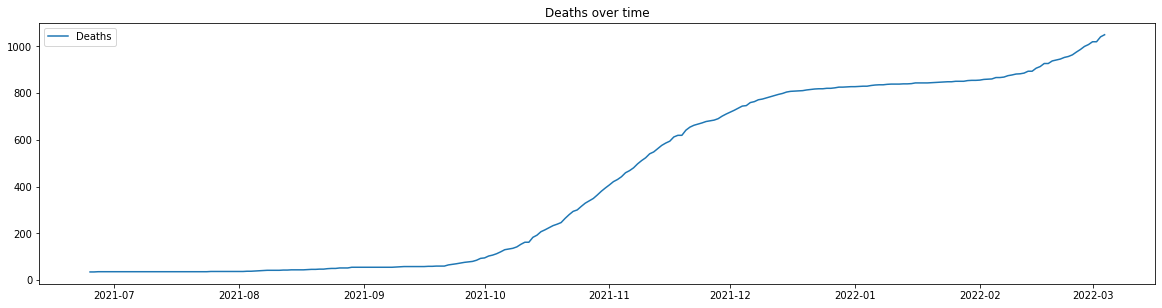

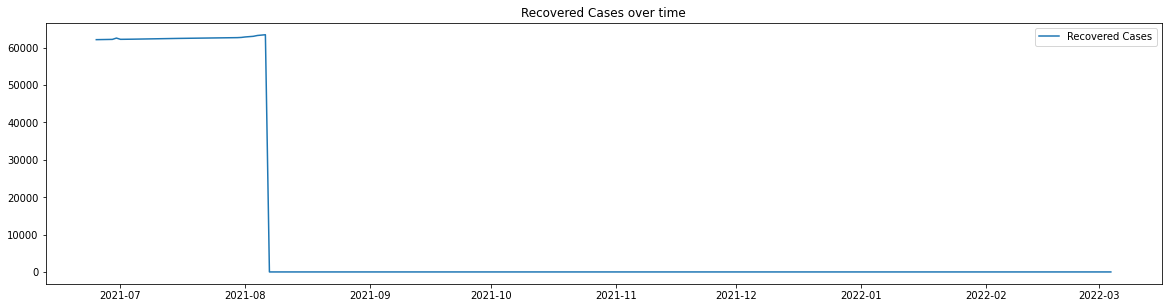

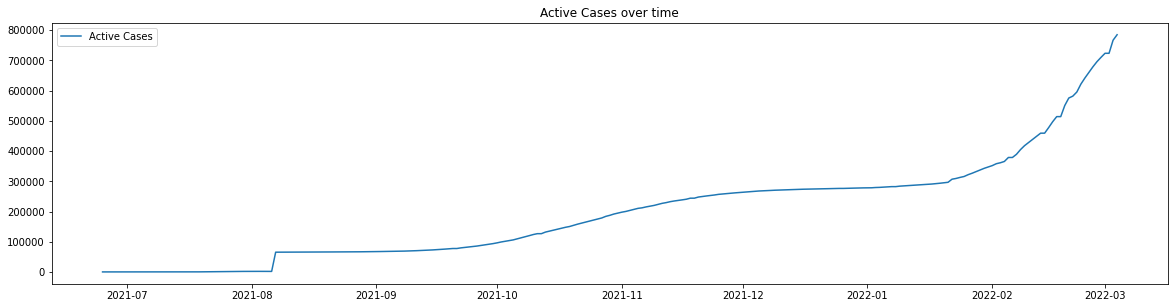

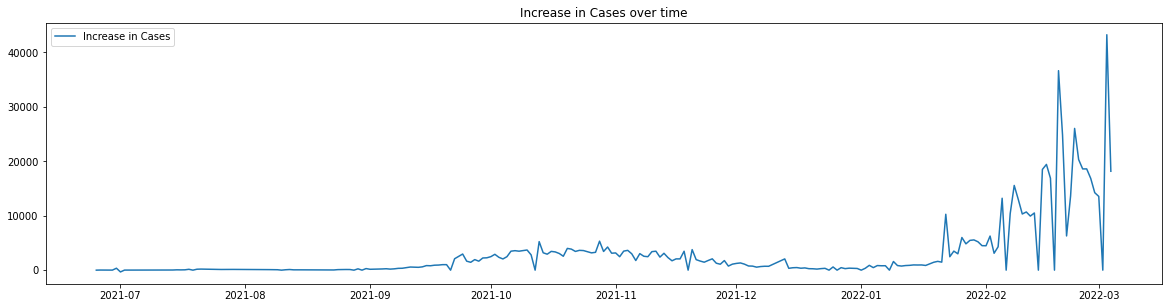

In [5]:
# individual plots
visualize_cases([confirmed_cases], dates, ['Confirmed Cases'])
visualize_cases([death_cases], dates, ['Deaths'])
visualize_cases([recovered_cases], dates, ['Recovered Cases'])
visualize_cases([active_cases], dates, ['Active Cases'])
visualize_cases([increase_in_cases], dates, ['Increase in Cases'])


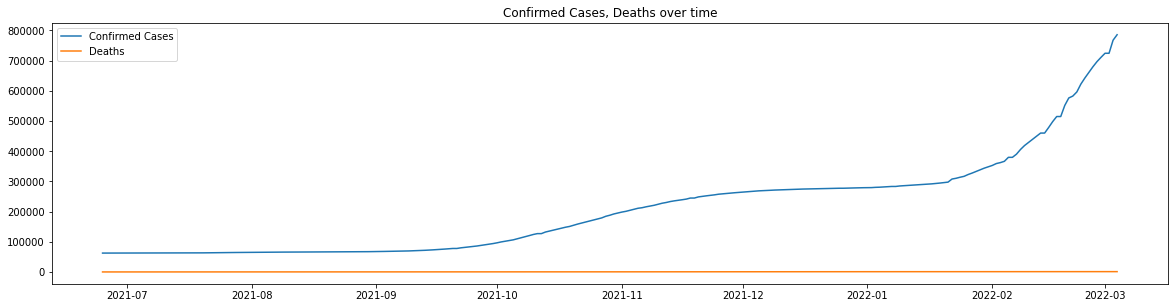

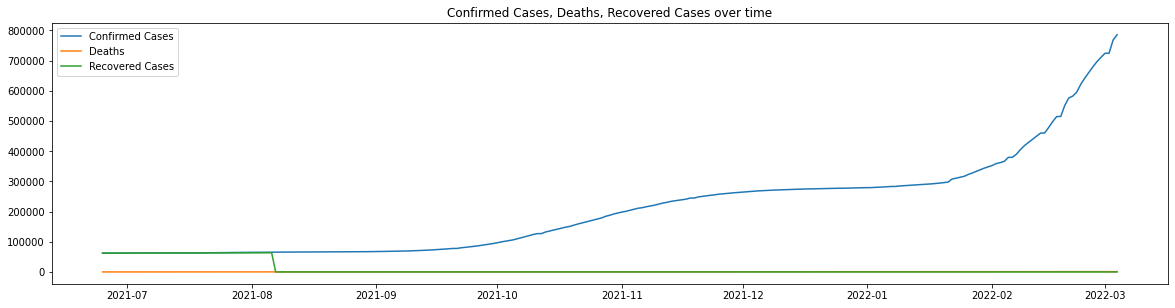

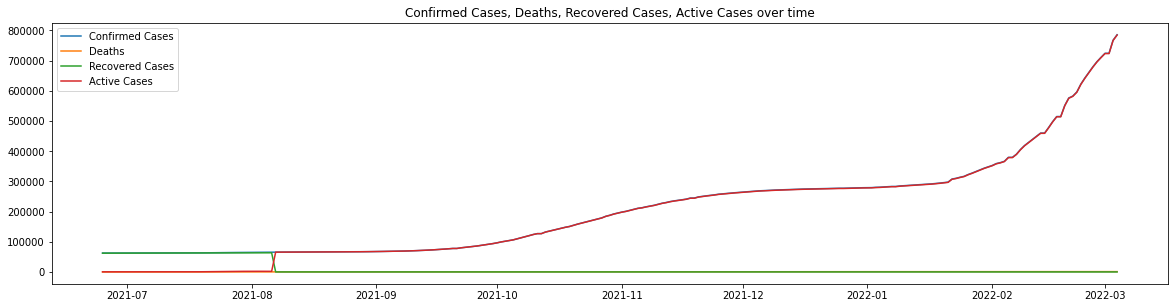

In [6]:
# group some of the plots together
visualize_cases([confirmed_cases, death_cases], dates, ['Confirmed Cases', 'Deaths'])
visualize_cases([confirmed_cases, death_cases, recovered_cases], dates, ['Confirmed Cases', 'Deaths', 'Recovered Cases'])
visualize_cases([confirmed_cases, death_cases, recovered_cases, active_cases], dates, ['Confirmed Cases', 'Deaths', 'Recovered Cases', 'Active Cases'])
